Examine the $SFR--M_*$ plane of high resolution EAGLE simulation

In [1]:
import numpy as np
# --- local ---
from letstalkaboutquench import util as UT
from letstalkaboutquench import catalogs as Cats

In [2]:
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

read in high resolution EAGLE data

In [3]:
f_hres = ''.join([UT.dat_dir(), 'EAGLE_RefL0025_MstarSFR100Myr_allabove2.26e7Msun.txt']) 
eagle_hres = np.loadtxt(f_hres, skiprows=1, unpack=True, usecols=[2, 3, 5])

In [4]:
cats = Cats.Catalog()
logM_eagle0, logSFRinst_eagle, _, censat_inst = cats.Read('eagle_inst')

/Users/chang/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:94: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR) # log SFRs

------ eagle_inst ------
10295 of 29810 galaxies have 0/non-finite SFRs


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


(-4.0, 2.0)

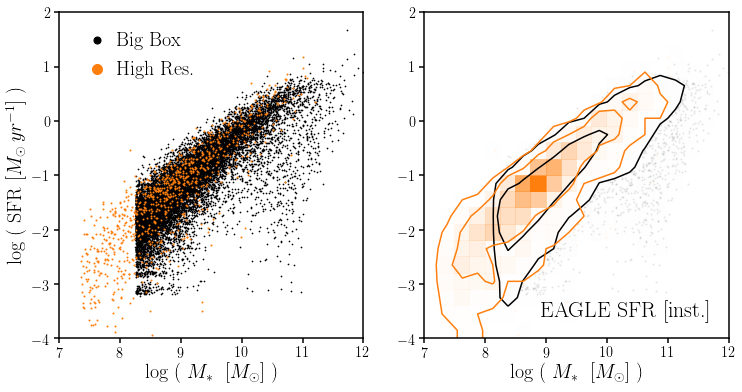

In [5]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_eagle0[censat_inst == 1], logSFRinst_eagle[censat_inst == 1], c='k', s=0.5, label='Big Box')
sub.scatter(eagle_hres[0], np.log10(eagle_hres[1]), c='C1', s=1, label='High Res.')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_eagle0[censat_inst == 1], logSFRinst_eagle[censat_inst == 1], color='k',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(eagle_hres[0], np.log10(eagle_hres[1]), color='C1',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

In [6]:
cats = Cats.Catalog()
logM_eagle1, logSFR100_eagle, _, censat_100 = cats.Read('eagle_100myr')


------ eagle_100myr ------
14743 of 29810 galaxies have 0/non-finite SFRs


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


(-4.0, 2.0)

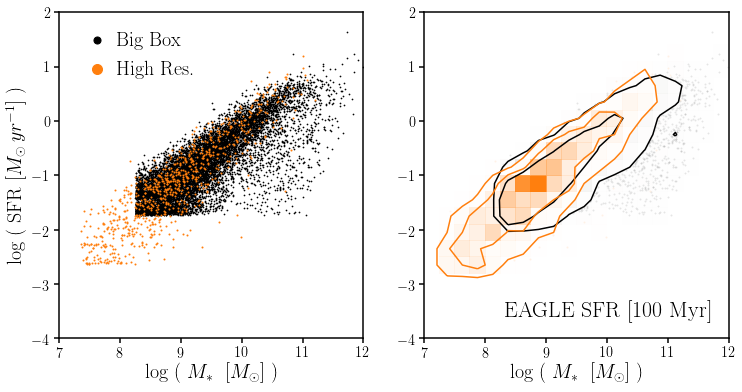

In [7]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_eagle1[censat_100 == 1], logSFR100_eagle[censat_100 == 1], c='k', s=0.5, label='Big Box')
sub.scatter(eagle_hres[0], np.log10(eagle_hres[2]), c='C1', s=1, label='High Res.')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_eagle1[censat_100 == 1], logSFR100_eagle[censat_100 == 1], color='k',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(eagle_hres[0], np.log10(eagle_hres[2]), color='C1',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

In [8]:
f_hres2 = ''.join([UT.dat_dir(), 'EAGLE_RecalL0025_MstarSFR100Myr_allabove2.26e7Msun.txt']) 
eagle_hres2 = np.loadtxt(f_hres2, skiprows=1, unpack=True, usecols=[2, 3, 5])

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


(-4.0, 2.0)

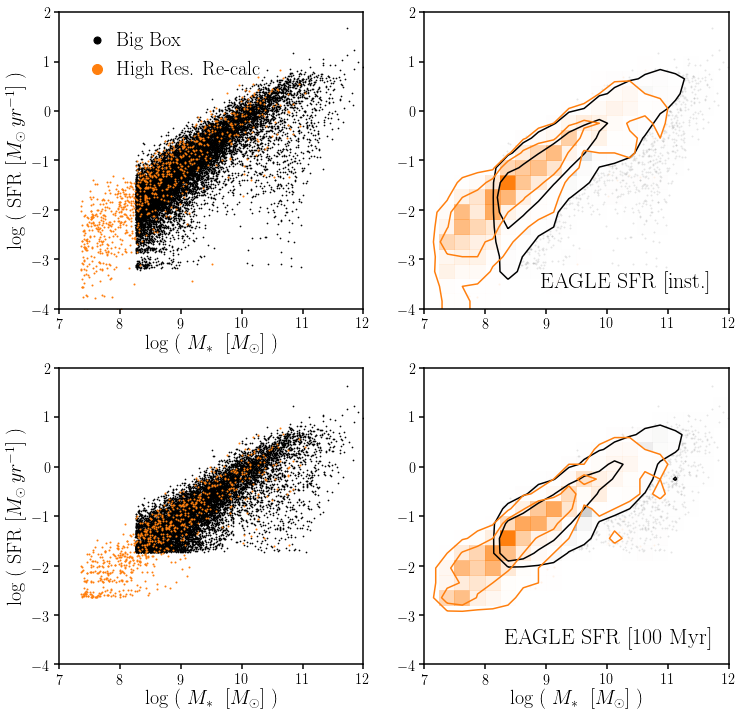

In [14]:
fig = plt.figure(figsize=(12,12))
sub = fig.add_subplot(221)
sub.scatter(logM_eagle0[censat_inst == 1], logSFRinst_eagle[censat_inst == 1], c='k', s=0.5, label='Big Box')
sub.scatter(eagle_hres2[0], np.log10(eagle_hres2[1]), c='C1', s=1, label='High Res. Re-calc')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(222)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_eagle0[censat_inst == 1], logSFRinst_eagle[censat_inst == 1], color='k',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(eagle_hres2[0], np.log10(eagle_hres2[1]), color='C1',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
#sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(223)
sub.scatter(logM_eagle1[censat_100 == 1], logSFR100_eagle[censat_100 == 1], c='k', s=0.5, label='Big Box')
sub.scatter(eagle_hres2[0], np.log10(eagle_hres2[2]), c='C1', s=1, label='High Res. Recalc')
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(224)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_eagle1[censat_100 == 1], logSFR100_eagle[censat_100 == 1], color='k',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(eagle_hres2[0], np.log10(eagle_hres2[2]), color='C1',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

In [32]:
f_hres3 = ''.join([UT.dat_dir(), 'halos_m12.5n512_z0.0.txt'])
mufasa_hres = np.loadtxt(f_hres3, skiprows=1, unpack=True, usecols=[1, 4])

In [18]:
cats = Cats.Catalog()
logM_mufasa0, logSFRinst_mufasa, _, censat_mufinst = cats.Read('mufasa_inst')


------ mufasa_inst ------
3644 of 7985 galaxies have 0/non-finite SFRs


In [34]:
cats = Cats.Catalog()
logM_mufasa1, logSFR100_mufasa, _, censat_muf100 = cats.Read('mufasa_100myr')


------ mufasa_100myr ------
4783 of 7985 galaxies have 0/non-finite SFRs


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


(-4.0, 2.0)

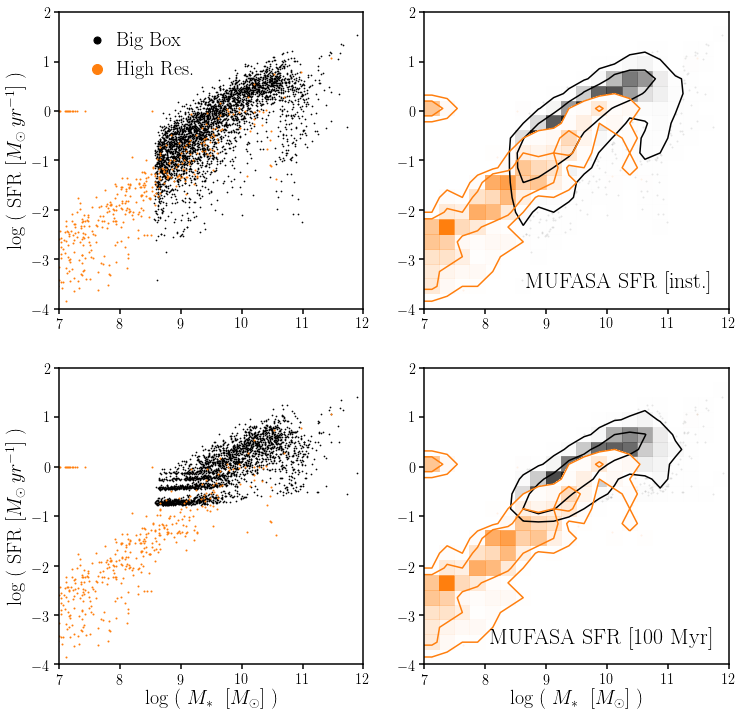

In [39]:
fig = plt.figure(figsize=(12,12))
sub = fig.add_subplot(221)
sub.scatter(logM_mufasa0[censat_mufinst == 1], logSFRinst_mufasa[censat_mufinst == 1], c='k', s=0.5, label='Big Box')
sub.scatter(np.log10(mufasa_hres[0]), np.log10(mufasa_hres[1]), c='C1', s=1, label='High Res.')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(222)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_mufasa0[censat_inst == 1], logSFRinst_mufasa[censat_inst == 1], color='k',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(np.log10(mufasa_hres[0]), np.log10(mufasa_hres[1]), color='C1',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
sub.text(0.95, 0.05, 'MUFASA SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(223)
sub.scatter(logM_mufasa1[censat_muf100 == 1], logSFR100_mufasa[censat_muf100 == 1], c='k', s=0.5, label='Big Box')
sub.scatter(np.log10(mufasa_hres[0]), np.log10(mufasa_hres[1]), c='C1', s=1, label='High Res.')
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(224)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_mufasa1[censat_muf100 == 1], logSFR100_mufasa[censat_muf100 == 1], color='k',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(np.log10(mufasa_hres[0]), np.log10(mufasa_hres[1]), color='C1',
           levels=[0.68, 0.95], 
           range=plot_range,
           plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
sub.text(0.95, 0.05, 'MUFASA SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])